<a href="https://colab.research.google.com/github/SteAmarante/python-data-science/blob/main/aula_07/exercicios_de_fixa%C3%A7%C3%A3o_graficos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercicio de fixação dos gráficos.
Crie dois de cada dos seguintes gráficos utilizando a base do SICRO. Abaixo de cada gráfico, escreva o insight principal que ele revela.

In [196]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
df = pd.read_csv("/content/SICRO_2023_2024_Sudeste.csv", encoding = "latin1")
df

,CÓDIGO,DESCRIÇÃO,UNIDADE,UF,Preço.Entregue,Preço.Final,REF,PEI,Relação.Liderança,Item.Líder,Família,TipoInsumo,Nota.Revisional,Região
0,M0181,Ancoragem ativa para lajes para 3 cordoalhas -...,un,SP,285.8051,285.8051,202307,P,LÍDER,M0181,ANCORAGEM ATIVA LAJES 15,Material DMT,Não,Sudeste
1,M0181,Ancoragem ativa para lajes para 3 cordoalhas -...,un,RJ,286.5283,286.5283,202307,DMT,LÍDER,M0181,ANCORAGEM ATIVA LAJES 15,Material DMT,Não,Sudeste
2,M0181,Ancoragem ativa para lajes para 3 cordoalhas -...,un,MG,286.7930,286.7930,202307,DMT,LÍDER,M0181,ANCORAGEM ATIVA LAJES 15,Material DMT,Não,Sudeste
3,M0181,Ancoragem ativa para lajes para 3 cordoalhas -...,un,ES,287.3387,287.3387,202307,DMT,LÍDER,M0181,ANCORAGEM ATIVA LAJES 15,Material DMT,Não,Sudeste
4,M0152,Ancoragem ativa para lajes para 3 cordoalhas -...,un,SP,233.3991,233.3991,202307,P,LÍDER,M0152,ANCORAGEM ATIVA LAJES 12,Material DMT,Não,Sudeste
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45531,P9880,Piloto fluvial,mês,SP,3456.5300,3456.5300,202407,MDO,LÍDER,P9880,Sem Família,Mão de obra,Não,Sudeste
45532,P9946,Engenheiro auxiliar,mês,ES,12002.0000,12002.0000,202407,MDO,LÍDER,P9946,Sem Família,Mão de obra,Não,Sudeste
45533,P9946,Engenheiro auxiliar,mês,MG,12002.0000,12002.0000,202407,MDO,LÍDER,P9946,Sem Família,Mão de obra,Não,Sudeste
45534,P9946,Engenheiro auxiliar,mês,RJ,12002.0000,12002.0000,202407,MDO,LÍDER,P9946,Sem Família,Mão de obra,Não,Sudeste


In [198]:
SICRO = df.copy()
SICRO = SICRO.dropna()
SICRO = SICRO.drop_duplicates()

In [199]:
SICRO.isnull().sum()

,0
CÓDIGO,0
DESCRIÇÃO,0
UNIDADE,0
UF,0
Preço.Entregue,0
Preço.Final,0
REF,0
PEI,0
Relação.Liderança,0
Item.Líder,0


In [200]:
SICRO.isnull().sum().sum()

np.int64(0)

##Colunas -Preço médio por UF de um item e uma familia;

In [201]:
item_df = SICRO.loc[SICRO["Item.Líder"] == "M0181", ["UF", "Preço.Final"]]
familia_df = SICRO.loc[SICRO["Família"] == "ANCORAGEM ATIVA LAJES 15", ["UF", "Preço.Final"]]

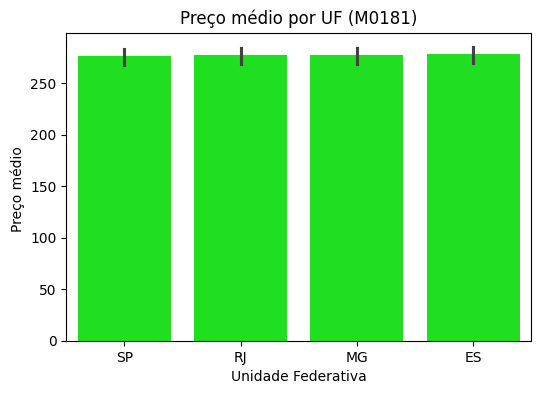

In [220]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=item_df,
    x="UF",
    y="Preço.Final",
    estimator="mean",
    color="lime"
)

plt.title("Preço médio por UF (M0181)")
plt.xlabel("Unidade Federativa")
plt.ylabel("Preço médio ")
plt. show()

##Barras -Preço total por UF, Por tipo insumo e por família;



In [203]:
insumo_df = SICRO.loc[SICRO["TipoInsumo"] == "Material DMT", ["UF", "Preço.Final"]]
familia2_df = SICRO.loc[SICRO["Família"] == "ANCORAGEM ATIVA LAJES 15", ["UF", "Preço.Final"]]

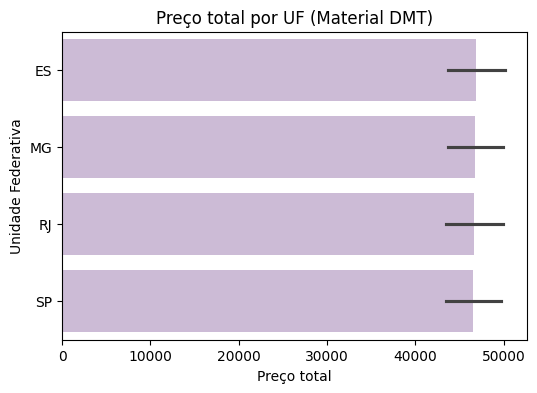

In [204]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=insumo_df,
    x = "Preço.Final",
    y = "UF",
    order=insumo_df.groupby("UF")["Preço.Final"].sum().sort_values(ascending=False).index,
    color="#CDB6DA"
)

plt.title("Preço total por UF (Material DMT)")
plt.xlabel("Preço total")
plt.ylabel("Unidade Federativa")
plt. show()

##Linha temporal -Evolução mensal do preço;


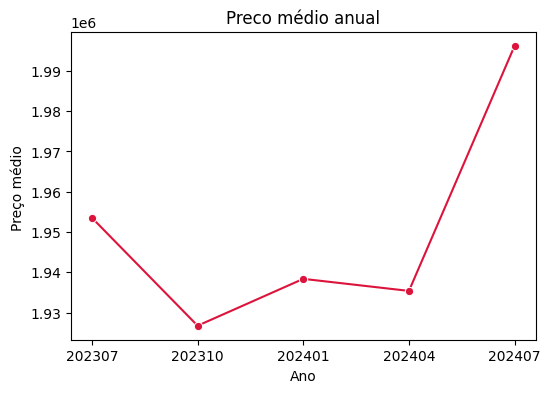

In [205]:
df_year = SICRO.groupby("REF")["Preço.Final"].mean().reset_index()

plt.figure(figsize=(6,4))
sns.lineplot(
    data=df_year,
    x="REF",
    y="Preço.Final",
    marker="o",
    color="crimson"
)

plt.title("Preco médio anual")
plt.xlabel("Ano")
plt.ylabel("Preço médio ")
plt.show()


##Histograma - Distribuição do preço para um tipo insumo (DMT, MDO, Equip ou Liderado) e uma família;



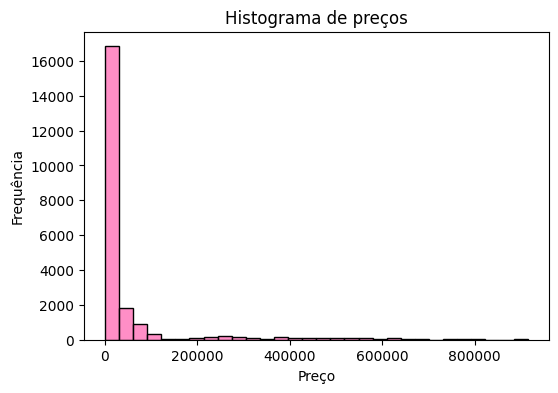

In [206]:
teste = SICRO[SICRO["TipoInsumo"] == "Material DMT"]

plt.figure(figsize=(6, 4))
sns.histplot(
    teste["Preço.Final"],
    bins=30,
    kde=False,
    color="hotpink"
)

plt.title("Histograma de preços")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

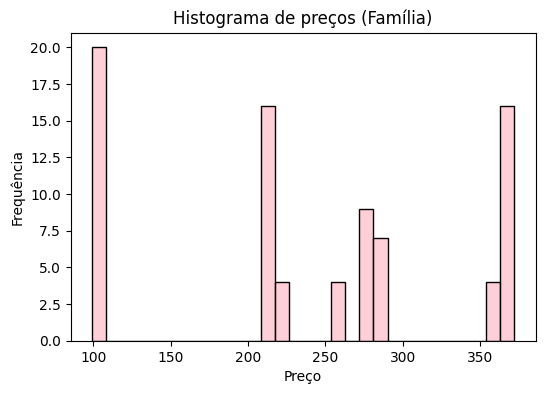

In [207]:
familia3_df = SICRO.loc[SICRO["Família"] == "ANCORAGEM ATIVA LAJES 15",]

plt.figure(figsize=(6, 4))
sns.histplot(
    familia3_df["Preço.Final"],
    bins=30,
    kde=False,
    color="pink"
)

plt.title("Histograma de preços (Família)")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.show()

##Dispersão - Relação do preço entregue para o preço final;

---





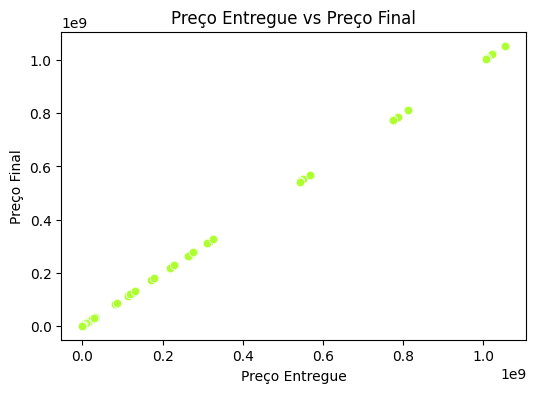

In [208]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    data=SICRO,
    x="Preço.Entregue",
    y="Preço.Final",
    alpha=0.7,
    color="greenyellow"
)

plt.title("Preço Entregue vs Preço Final")
plt.xlabel("Preço Entregue")
plt.ylabel("Preço Final")
plt.show()

##Boxplot - Preços por UF para um tipo insumo e uma familia (DMT, MDO, Equip ou Liderado);



In [209]:
insumo4_df = SICRO.loc[SICRO["TipoInsumo"] == "Material DMT", ["UF", "Preço.Final"]]

/tmp/ipython-input-718556830.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


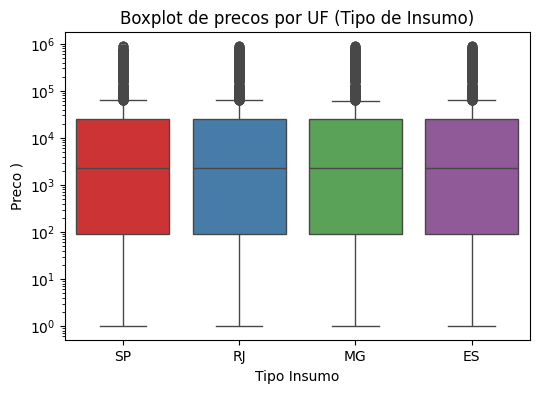

In [215]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=insumo4_df,
    x="UF",
    y="Preço.Final",
    palette="Set1"
)
plt.yscale("log")
plt.title("Boxplot de precos por UF (Tipo de Insumo)")
plt.xlabel("Tipo Insumo")
plt.ylabel("Preco )")
plt.show()

In [213]:
familia4_df = SICRO.loc[SICRO["Família"] == "ANCORAGEM ATIVA LAJES 15", ["UF", "Preço.Final"]]

/tmp/ipython-input-2358713098.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


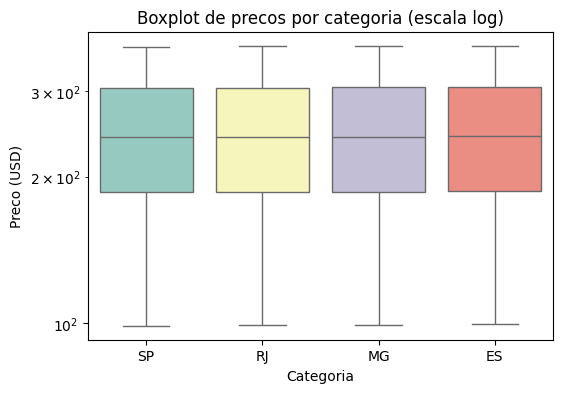

In [217]:
plt.figure(figsize=(6,4))
sns.boxplot(
    data=familia4_df,
    x="UF",
    y="Preço.Final",
    palette="Set3"
)
plt.yscale("log")
plt.title("Boxplot de precos por categoria (escala log)")
plt.xlabel("Categoria")
plt.ylabel("Preco (USD)")
plt.show()

##Heatmap correlação - Entre o preço final e entregue.

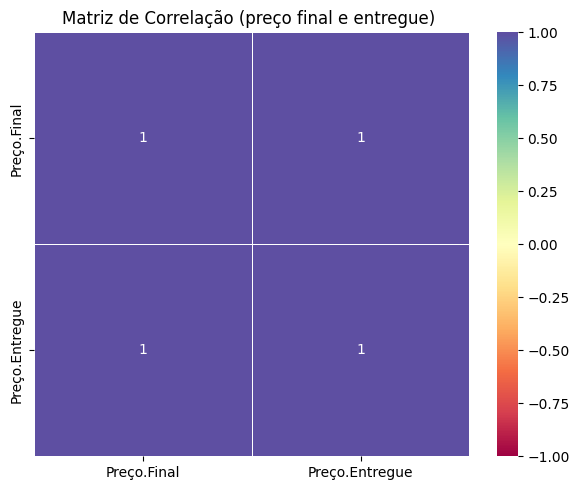

In [219]:
corr = SICRO[["Preço.Final","Preço.Entregue"]].corr()

plt.figure(figsize=(6,5))
sns.heatmap(
    corr,
    annot=True,
    cmap="Spectral",
    vmin =- 1,
    vmax=1,
    linewidths=0.5
)

plt.title("Matriz de Correlação (preço final e entregue) ")
plt.tight_layout()
plt.show()